In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

In [2]:
#data preprocessing (randomisation+normalisation)
f = open('Dataset_q1.data', 'r')
f1 = f.readlines()
random.shuffle(f1)
n = len(f1)
x = []
y = []
p = 0
# infant =0 male = 2 female =1 infant =0
for i in f1:
    p = i.split()
    if (p[0] == 'M'):
        p[0] = 2
    elif (p[0] == 'F'):
        p[0] = 1
    elif (p[0] == 'I'):
        p[0] = 0
    y.append([int(p[-1])])
    p = p[:-1]
    x.append([1] + list(map(float, p)))  # this to for x0 to be 1

max_val = [0]*len(x[0])
for i in range(len(x)):
        for j in range(len(x[i])):
            max_val[j] = max(max_val[j],x[i][j])
for i in range(len(x)):
    for j in range(len(x[i])):
        x[i][j] = x[i][j]/max_val[j]
# x = np.asmatrix(x)
# y = np.asmatrix(y)
alpha = 0.1  # learning rate

In [3]:
def regression(x, y, alpha):
    epoch = 10000
    rms_arr = [0] * epoch
    theta = np.zeros((1, 9))
    for i in range(9):
        theta[0, i] = 2
    y = np.reshape(y, (-1, 1))
    for k in range(epoch):
        b = x @ theta.T
        c = b - y
        ss = np.sum(x * c, axis=0)
        theta -= (alpha * ss / x.shape[0])
        rms_arr[k] = cost(x, y, theta)
    
    plt.plot(rms_arr)
    plt.show()
    return theta,rms_arr[-1]

In [4]:
def cost(x, y, theta):
    y = np.reshape(y, (-1, 1))
    return math.sqrt(np.sum(np.power(((x @ theta.T) - y), 2)) / float(len(x)))

In [5]:
#implementing 5-fold
testing_x = []
training_x = []
testing_y = []
training_y = []
k = 5  # folds
fold_size = int(len(x) / k)
for i in range(k):
    test_x = []
    test_y = []
    train_x = []
    train_y = []
    for j in range(len(x)):
        if (j >= (i * fold_size) and j < ((i + 1) * fold_size)):
            test_x.append(x[j])
            test_y.append(y[j])
        else:
            train_x.append(x[j])
            train_y.append(y[j])
    testing_x.append(test_x)
    testing_y.append(test_y)
    training_x.append(train_x)
    training_y.append(train_y)

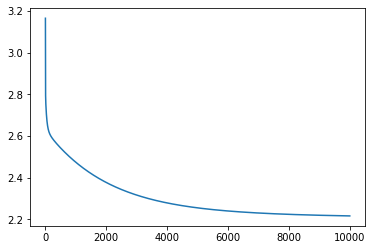

Parameter vector Regression =>
[[  2.82366496]
 [  0.78451509]
 [  2.36790205]
 [  5.96523496]
 [  6.70412636]
 [  4.00699415]
 [-17.86181472]
 [ -1.62630785]
 [ 17.36675286]]
2.2164752298497836 RMSE Training set Regrssion
2.3020284594938447 RMSE Testing set Regrssion
Parameter vector Normal eqn =>
[[  2.83508285]
 [  0.73450109]
 [  0.04054569]
 [  7.69352664]
 [ 11.42070251]
 [ 22.71633657]
 [-29.14571705]
 [ -6.28481642]
 [  9.75561755]]
2.1867473216103797 RMSE Training set Normal Eqn
2.2457895567483894 RMSE Testing set Normal Eqn
-------------------------------------------


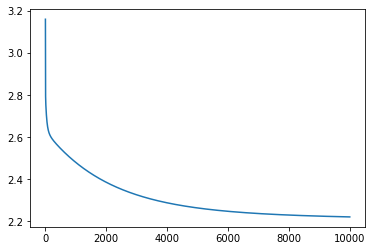

Parameter vector Regression =>
[[  2.92983927]
 [  0.86195539]
 [  1.97984299]
 [  6.02173977]
 [  6.61906483]
 [  4.66589251]
 [-17.67965236]
 [ -2.43584869]
 [ 17.51680006]]
2.221418329109552 RMSE Training set Regrssion
2.2754329646467997 RMSE Testing set Regrssion
Parameter vector Normal eqn =>
[[  3.00284477]
 [  0.80086295]
 [ -0.6980653 ]
 [  7.99474733]
 [ 11.43545925]
 [ 28.95446329]
 [-31.81009125]
 [ -9.02291041]
 [  7.85011574]]
2.179275654667055 RMSE Training set Normal Eqn
2.2742351831850565 RMSE Testing set Normal Eqn
-------------------------------------------


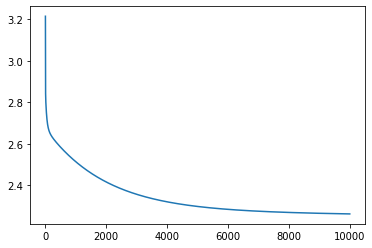

Parameter vector Regression =>
[[  2.93966039]
 [  0.87611002]
 [  1.91249003]
 [  6.11957972]
 [  6.8384762 ]
 [  4.17066964]
 [-17.42951827]
 [ -2.21214163]
 [ 17.44213393]]
2.2631070143493575 RMSE Training set Regrssion
2.112154957707168 RMSE Testing set Regrssion
Parameter vector Normal eqn =>
[[  2.96000219]
 [  0.82149533]
 [ -0.94766097]
 [  8.35839115]
 [ 11.85906639]
 [ 25.90626671]
 [-30.00689017]
 [ -8.02257115]
 [  8.45372914]]
2.228573210771356 RMSE Training set Normal Eqn
2.0700711725910823 RMSE Testing set Normal Eqn
-------------------------------------------


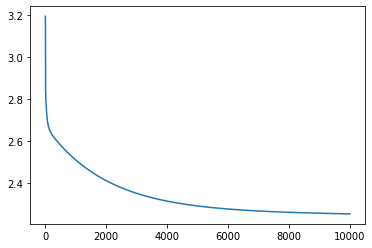

Parameter vector Regression =>
[[  3.08880481]
 [  0.84511773]
 [  1.82352678]
 [  5.59097172]
 [  7.73067228]
 [  4.54349193]
 [-17.52587326]
 [ -2.0676619 ]
 [ 17.5168784 ]]
2.25513524650131 RMSE Training set Regrssion
2.136020485537158 RMSE Testing set Regrssion
Parameter vector Normal eqn =>
[[  2.83962291]
 [  0.77028593]
 [ -0.94782275]
 [  6.33384708]
 [ 24.34971745]
 [ 24.55746902]
 [-28.71784001]
 [ -7.95963452]
 [  8.19022199]]
2.2132135882850146 RMSE Training set Normal Eqn
2.1955622117832543 RMSE Testing set Normal Eqn
-------------------------------------------


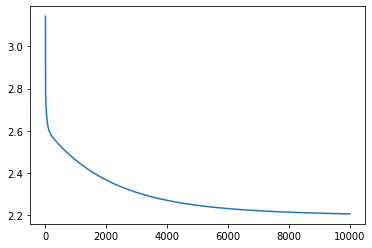

Parameter vector Regression =>
[[  3.00363938]
 [  0.78234967]
 [  1.81846756]
 [  5.91844248]
 [  6.29451301]
 [  4.7973662 ]
 [-17.52765473]
 [ -1.92237344]
 [ 17.4176732 ]]
2.2072048634421333 RMSE Training set Regrssion
2.335671535074897 RMSE Testing set Regrssion
Parameter vector Normal eqn =>
[[  3.12646474]
 [  0.73771809]
 [ -0.9353935 ]
 [  7.90354384]
 [ 10.4573172 ]
 [ 26.63179181]
 [-30.159918  ]
 [ -7.702799  ]
 [  8.71517522]]
2.1706840294107645 RMSE Training set Normal Eqn
2.307011270592964 RMSE Testing set Normal Eqn
-------------------------------------------


In [6]:
for i in range(5):  # change to 5
    train_x = np.asarray(training_x[i])
    test_x = np.asarray(testing_x[i])
    train_y = np.asarray(training_y[i])
    test_y = np.asarray(testing_y[i])
    theta,rms_err = regression(train_x, train_y, alpha)
    print('Parameter vector Regression =>')
    print(theta.T)
    print(rms_err, 'RMSE Training set Regrssion')
    print(cost(test_x, test_y, theta), 'RMSE Testing set Regrssion')
    #normal equation
    theta1 = ((np.linalg.inv(train_x.T @ train_x))@(train_x.T @ train_y)).T
    print('Parameter vector Normal eqn =>')
    print(theta1.T)
    print(cost(train_x,train_y,theta1),'RMSE Training set Normal Eqn')
    print(cost(test_x,test_y,theta1),'RMSE Testing set Normal Eqn')
    print('-------------------------------------------')